<a href="https://colab.research.google.com/github/joaoclaudiobueno/Streamings_Spotify/blob/main/StreamingsSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vamos fazer uma análise exploratória dos dados de streamming de um perfil disponibilizado pelo Spotify.

In [5]:
#Primeiro, importando as bibliotecas que poderão ser úteis para essa análise de dados.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
#Agora, vamos pedir ao pandas para ler nosso banco de dados.

dados_spotify = pd.read_csv("spotify_history.csv")
dados_spotify

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


### Nesse dataframe, temos informações sobre a data de reprodução das faixas, o tempo reproduzido (em ms), o nome das faixas, artistas e álbuns e algumas informações sobre a reprodução: razão de ínicio, fim, modo aleatório ou skiped.

### Em seguida, vamos melhorar a visualização e preparar os dados para usarmos em nossas análises.

In [7]:
# Vamos começar renomeando as colunas.

dados_spotify = dados_spotify.rename(columns={
    'spotify_track_uri': 'URI da Faixa',
    'ts': 'Timestamp',
    'platform': 'Plataforma',
    'ms_played': 'Milissegundos Tocados',
    'track_name': 'Música',
    'artist_name': 'Artista',
    'album_name': 'Álbum',
    'reason_start': 'Razão de Início',
    'reason_end': 'Razão de Término',
    'shuffle': 'Aleatório?',
    'skipped': 'Skip?'
})

In [8]:
# Também é interessante converter o tempo de reprodução em milissegundos para horas.

dados_spotify = dados_spotify.rename(columns={'Milissegundos Tocados': 'Horas Tocadas'})
dados_spotify['Horas Tocadas'] = dados_spotify['Horas Tocadas'] / 36000000

Também é interessante alterar as strings dos valores para facilitar o entendimento.

In [9]:
# Para alterar as razões de início e fim, vamos criar uma visualização desses valores sem repetições

dados_spotify['Razão de Início'].drop_duplicates()

,Razão de Início
0,autoplay
1,clickrow
3,trackdone
6,nextbtn
52,backbtn
95,unknown
101,popup
102,appload
121,fwdbtn
164,trackerror


In [10]:
dados_spotify['Razão de Término'].drop_duplicates()

,Razão de Término
0,clickrow
2,unknown
4,nextbtn
17,trackdone
51,backbtn
62,reload
100,popup
101,endplay
120,fwdbtn
214,appload


In [11]:
# Sabendo os valores presentes nessa coluna, vamos altera-los usando a função replace com o dict criado.

tipos_inicio = {
    "autoplay": "Reprodução Automática",
    "clickrow": "Reprodução por Clique",
    "trackdone": "Começou Após Anterior",
    "nexttbtn": "Começou Após Pular",
    "backtbtn": "Começou Após Voltar",
    "unknown": "Desconhecido",
    "popup": "Janela Pop-Up",
    "nextbtn": "Pulou a Música",
    "backbtn": "Voltou para Anterior",
    "appload": "Load do App",
    "fwdbtn": "Botão Avançar",
    "trackerror": "Falha ao Reproduzir",
    "NaN": "NaN",
    "remote": "Reprodução Remota",
    "endplay": "Fim da Reprodução",
    "playbtn": "Botão de Play"
}

dados_spotify['Razão de Início'] = dados_spotify['Razão de Início'].replace(tipos_inicio)

tipos_fim = {
    "clickrow": "Clicou em Outra Faixa",
    "unknown": "Desconhecido",
    "nextbtn": "Pulou a Música",
    "trackdone": "Faixa Concluída",
    "backbtn": "Voltou para Anterior",
    "reload": "Recarregamento",
    "popup": "Janela Pop-Up",
    "endplay": "Faixa Encerrada",
    "fwdbtn": "Botão Avançar",
    "appload": "Load do App",
    "NaN": "NaN",
    "unexpected-exit-while-paused": "Saída Inesperada (Pausado)",
    "unexpected-exit": "Saída Inesperada",
    "logout": "Deslogou",
    "remote": "Encerrada Remotamente",
    "trackerror": "Erro na Faixa"
}

dados_spotify['Razão de Término'] = dados_spotify['Razão de Término'].replace(tipos_fim)

In [12]:
# Vamos fazer um processo semelhante com as demais colunas.

tipos_bool = {
    True: "Sim",
    False: "Não"
}

dados_spotify['Aleatório?'] = dados_spotify['Aleatório?'].replace(tipos_bool)
dados_spotify['Skip?'] = dados_spotify['Skip?'].replace(tipos_bool)

In [13]:
dados_spotify['Plataforma'].drop_duplicates()

,Plataforma
0,web player
95,windows
208,android
577,iOS
4017,cast to device
130318,mac


In [14]:
tipos_plataforma = {
    "web player": "Navegador",
    "android": "Android",
    "ios": "iOS",
    "windows": "Windows",
    "cast to device": "Transmissão",
    "mac": "Mac"
}

dados_spotify['Plataforma'] = dados_spotify['Plataforma'].replace(tipos_plataforma)

Ok, todos os valores do df foram convertidos para pt/br. Agora, vamos extrair algumas informações da data de reprodução das faixas.

In [15]:
# Aqui, usamos o comando do pandas para utilizar a coluna Timestamp para extrair as informações de ano, mês, dia e hora do dia através dos comando dt.year etc.

dados_spotify['Timestamp'] = pd.to_datetime(dados_spotify['Timestamp'])
dados_spotify['Ano'] = dados_spotify['Timestamp'].dt.year
dados_spotify['Mês'] = dados_spotify['Timestamp'].dt.month
dados_spotify['Dia'] = dados_spotify['Timestamp'].dt.day
dados_spotify['Dia do Ano'] = dados_spotify['Timestamp'].dt.day_of_year
dados_spotify['Hora do Dia'] = dados_spotify['Timestamp'].dt.hour

In [16]:
# Além disso, vamos criar intervalos durante as horas do dia para separar em três períodos: manhã, tarde e noite. Vamos criar uma nova coluna utilizando a função apply com a função periodo_do_dia criada.

def periodo_do_dia(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 19:
        return 'Tarde'
    else:
        return 'Noite'

dados_spotify['Período do Dia'] = dados_spotify['Hora do Dia'].apply(periodo_do_dia)

In [17]:
# Apenas por uma questão de visualização, vamos alterar a ordem das colunas na tabela, além de retirar as colunas de URI e Timestamp.

dados_spotify = dados_spotify.drop(['URI da Faixa','Timestamp'], axis=1)

ordem_colunas = [
    'Ano', 'Mês', 'Dia', 'Dia do Ano', 'Hora do Dia',  'Período do Dia',
    'Plataforma', 'Horas Tocadas', 'Música', 'Artista', 'Álbum',
    'Razão de Início', 'Razão de Término', 'Aleatório?', 'Skip?'
]

dados_spotify = dados_spotify[ordem_colunas]

Depois dessas mudanças, conseguimos ter uma melhor visualização das informações da nossa base de dados.

In [18]:
dados_spotify.head(10)

,Ano,Mês,Dia,Dia do Ano,Hora do Dia,Período do Dia,Plataforma,Horas Tocadas,Música,Artista,Álbum,Razão de Início,Razão de Término,Aleatório?,Skip?
0,2013,7,8,189,2,Noite,Navegador,0.000088,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,Reprodução Automática,Clicou em Outra Faixa,Não,Não
1,2013,7,8,189,2,Noite,Navegador,0.001718,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,Reprodução por Clique,Clicou em Outra Faixa,Não,Não
2,2013,7,8,189,2,Noite,Navegador,0.007927,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,Reprodução por Clique,Desconhecido,Não,Não
3,2013,7,8,189,2,Noite,Navegador,0.003723,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,Começou Após Anterior,Clicou em Outra Faixa,Não,Não
4,2013,7,8,189,3,Noite,Navegador,0.000000,Half Mast,Empire Of The Sun,Walking On A Dream,Reprodução por Clique,Pulou a Música,Não,Não
5,2013,7,8,189,3,Noite,Navegador,0.001763,Impossible,James Arthur,Impossible,Reprodução por Clique,Clicou em Outra Faixa,Não,Não
6,2013,7,8,189,3,Noite,Navegador,0.000000,We Own The Sky,M83,Saturdays = Youth,Pulou a Música,Pulou a Música,Não,Não
7,2013,7,8,189,3,Noite,Navegador,0.000035,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,Pulou a Música,Pulou a Música,Não,Não
8,2013,7,8,189,3,Noite,Navegador,0.000000,Happy Up Here,Röyksopp,Happy Up Here,Pulou a Música,Pulou a Música,Não,Não
9,2013,7,8,189,3,Noite,Navegador,0.000000,Phantom,Justice,Phantom,Pulou a Música,Clicou em Outra Faixa,Não,Não


### Agora, vamos começar a utilizar os nossos dados para realizar uma análise exploratória desse perfil.

Primeiro, vamos descobrir a quantidade total de horas tocadas por esse usuário nesse período de tempo.

In [19]:
soma_horas_tocadas = dados_spotify['Horas Tocadas'].sum()
maior_ano = dados_spotify['Ano'].max()
menor_ano = dados_spotify['Ano'].min()
print(f"Esse usuário passou um total de {soma_horas_tocadas:.2f} horas utilizando o spotify entre {menor_ano} e {maior_ano}.")

Esse usuário passou um total de 534.15 horas utilizando o spotify entre 2013 e 2024.


E qual será a média de horas ouvidas por esse usuário por dia? E por ano?

In [20]:
# Primeiro vamos agrupar as horas tocadas por datas de ano e dia para calcular a média dos valores.

horas_por_ano = dados_spotify.groupby('Ano')['Horas Tocadas'].sum().reset_index(name='Total Horas')
horas_por_dia = dados_spotify.groupby(['Ano', 'Mês', 'Dia'])['Horas Tocadas'].sum().reset_index(name='Total Horas')

media_horas_ano = horas_por_ano['Total Horas'].mean()
media_horas_dia = horas_por_dia['Total Horas'].mean()
minutos_por_dia = media_horas_dia * 60

print(f"O usuário escuta, em média, {media_horas_dia:.2f} horas ({minutos_por_dia:.2f} minutos) de música por dia e {media_horas_ano:.2f} horas de música por ano.")

O usuário escuta, em média, 0.20 horas (11.80 minutos) de música por dia e 44.51 horas de música por ano.


E qual será o ano que o usuário mais escutou música dentre esse período de tempo?

In [21]:
horas_por_ano = horas_por_ano.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)
horas_por_ano

,Ano,Total Horas
0,2020,92.065330
1,2021,89.175926
2,2017,67.064380
3,2022,64.158007
4,2023,51.506364
5,2024,48.270552
6,2019,47.916072
7,2018,47.422905
8,2016,19.762288
9,2015,5.924860


Então os anos de maior reprodução desse usuário foram os anos de 2020 e 2021. Mas e se quisermos saber qual as médias de tempo que esse usuário utilizou o Spotify nos últimos três anos?

In [22]:
horas_por_ano = horas_por_ano.sort_values(by='Ano', ascending=False).reset_index(drop=True)

media_horas_3anos = horas_por_ano.head(3)['Total Horas'].mean()
nova_media = media_horas_3anos - media_horas_ano

print(f"O usuário escutou, em média, {media_horas_3anos:.2f} horas de música por ano nos últimos três anos. O usuário se tornou mais ativo no Spotify ao decorrer dos anos.")

O usuário escutou, em média, 54.64 horas de música por ano nos últimos três anos. O usuário se tornou mais ativo no Spotify ao decorrer dos anos.


Vamos fazer uma representação gráfica para visualizar o comportamento desse usuário ao longo dos anos.

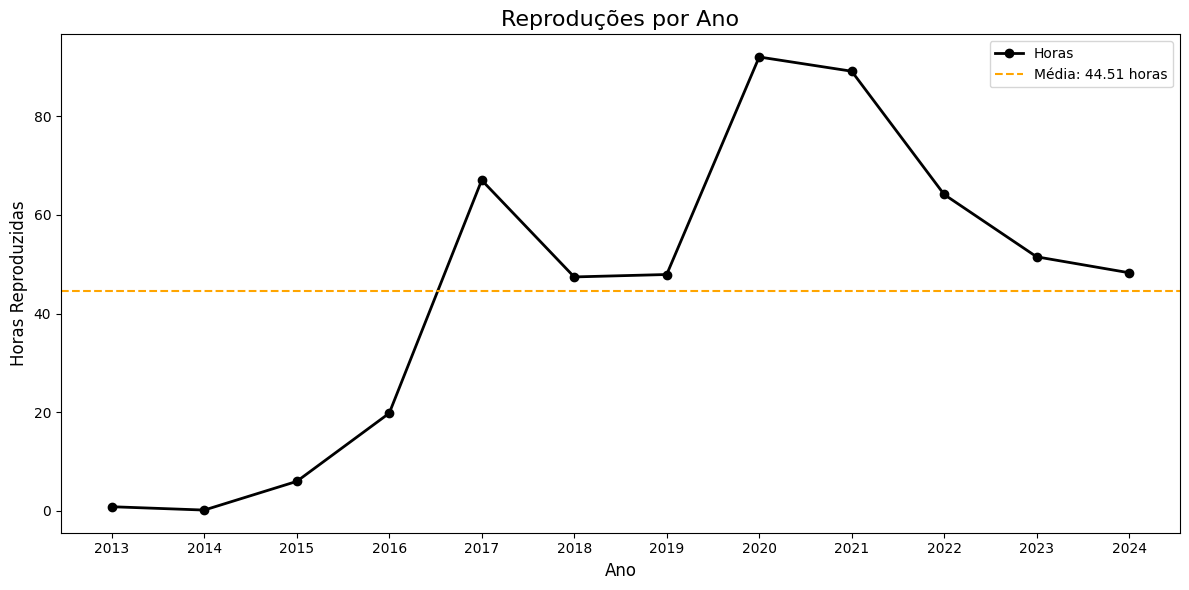

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(horas_por_ano['Ano'], horas_por_ano['Total Horas'], marker='o', color='black', linewidth=2, label= 'Horas')
plt.axhline(media_horas_ano, color='orange', linestyle='--', label=f'Média: {media_horas_ano:.2f} horas')

plt.title('Reproduções por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Horas Reproduzidas', fontsize=12)
plt.xticks(horas_por_ano['Ano'])

plt.legend()

plt.tight_layout()
plt.show()

Podemos observar um salto de horas utilizando o aplicativo entre 2019 e 2020. Esses dados mostram um possível efeito do contexto dos anos de 2020 e 2021, com a pandemia da Covid-19 e as campanhas de isolamento.

E se quisermos agora saber qual mês o usuário mais escutou música nos últimos três anos?

In [24]:
# Vamos filtrar nossos dados apenas com os últimos três anos para facilitar as análises.

ultimos_tres_anos = dados_spotify[dados_spotify['Ano'].isin([2022, 2023, 2024])]

In [25]:
horas_por_mes = ultimos_tres_anos.groupby(['Mês'])['Horas Tocadas'].sum().reset_index(name='Total Horas')
horas_por_mes = horas_por_mes.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)

mes_mais_ouvido = horas_por_mes.loc[0, 'Mês']
print(f"O mês que o usuário mais escutou música nos últimos três anos foi o mês {mes_mais_ouvido}.")



O mês que o usuário mais escutou música nos últimos três anos foi o mês 2.


E qual será o período do dia que o usuário mais escuta música?

In [26]:
periodo_mais_tocado = dados_spotify.groupby('Período do Dia')['Horas Tocadas'].sum().reset_index(name='Total Horas')
periodo_mais_tocado = periodo_mais_tocado.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)
periodo_mais_tocado

,Período do Dia,Total Horas
0,Noite,335.814573
1,Tarde,140.443058
2,Manhã,57.896006


Parece que temos alguém que é mais ativo no aplicativo durante a noite. Será que esse comportamento se reflete em todos os anos?

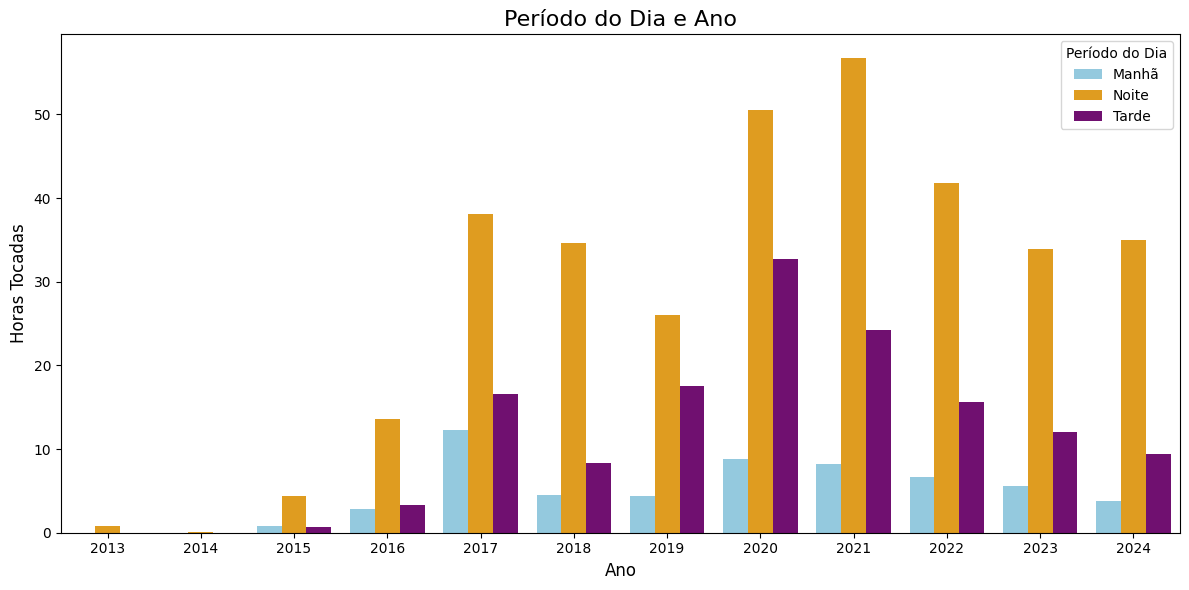

In [27]:
periodo_mais_tocado_ano = dados_spotify.groupby(['Ano', 'Período do Dia'])['Horas Tocadas'].sum().reset_index(name='Total Horas')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=periodo_mais_tocado_ano,
    x='Ano',
    y='Total Horas',
    hue='Período do Dia',
    palette=['skyblue', 'orange', 'purple']
)

plt.title('Período do Dia e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Horas Tocadas', fontsize=12)

plt.tight_layout()
plt.show()

Com base nesse gráfico, podemos dizer que o usuário mantém o mesmo perfil durante os anos, com noites mais ativas e manhãs de menor atividade.

### Agora que já fizemos algumas análises temporais sobre esse usuário, qual será o perfil musical dele?

Primeiro, quais seus três artistas preferidos (ou mais ouvidos)?

In [28]:
artistas_mais_tocados = dados_spotify.groupby('Artista')['Horas Tocadas'].sum().reset_index(name='Total Horas')
artistas_mais_tocados = artistas_mais_tocados.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)
artistas_mais_tocados.head(3)

,Artista,Total Horas
0,The Beatles,33.616238
1,The Killers,29.432125
2,John Mayer,20.144985


E quais suas cinco músicas preferidas?

In [29]:
musica_mais_tocada = dados_spotify.groupby(['Música', 'Artista', 'Álbum'])['Horas Tocadas'].sum().reset_index(name='Total Horas')
musica_mais_tocada = musica_mais_tocada.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)
musica_mais_tocada.head(5)

,Música,Artista,Álbum,Total Horas
0,Ode To The Mets,The Strokes,The New Abnormal,1.873099
1,The Return of the King (feat. Sir James Galway...,Howard Shore,The Lord of the Rings: The Return of the King,1.788935
2,The Fellowship Reunited (feat. Sir James Galwa...,Howard Shore,The Lord of the Rings - The Return of the King...,1.243243
3,19 Dias y 500 Noches - En Directo,Joaquín Sabina,Nos Sobran Los Motivos,1.192057
4,In the Blood,John Mayer,The Search for Everything,1.067419


Os dois artistas mais reproduzidos desse usuário não estão entre suas músicas mais ouvidas. Talvez isso seja uma sugestão de que esse usuário goste de apreciar o trabalho completo desses artistas, por exemplo ouvindo seus albuns.

In [30]:
album_mais_tocado = dados_spotify.groupby(['Álbum', 'Artista'])['Horas Tocadas'].sum().reset_index(name='Total Horas')
album_mais_tocado = album_mais_tocado.sort_values(by='Total Horas', ascending=False).reset_index(drop=True)
album_mais_tocado.head(5)

,Álbum,Artista,Total Horas
0,The New Abnormal,The Strokes,5.187719
1,The Beatles,The Beatles,5.184703
2,Imploding The Mirage,The Killers,4.442316
3,Abbey Road,The Beatles,4.128342
4,Blood On The Tracks,Bob Dylan,4.108028


E como será que se organizaram os artistas preferidos desse usuário?

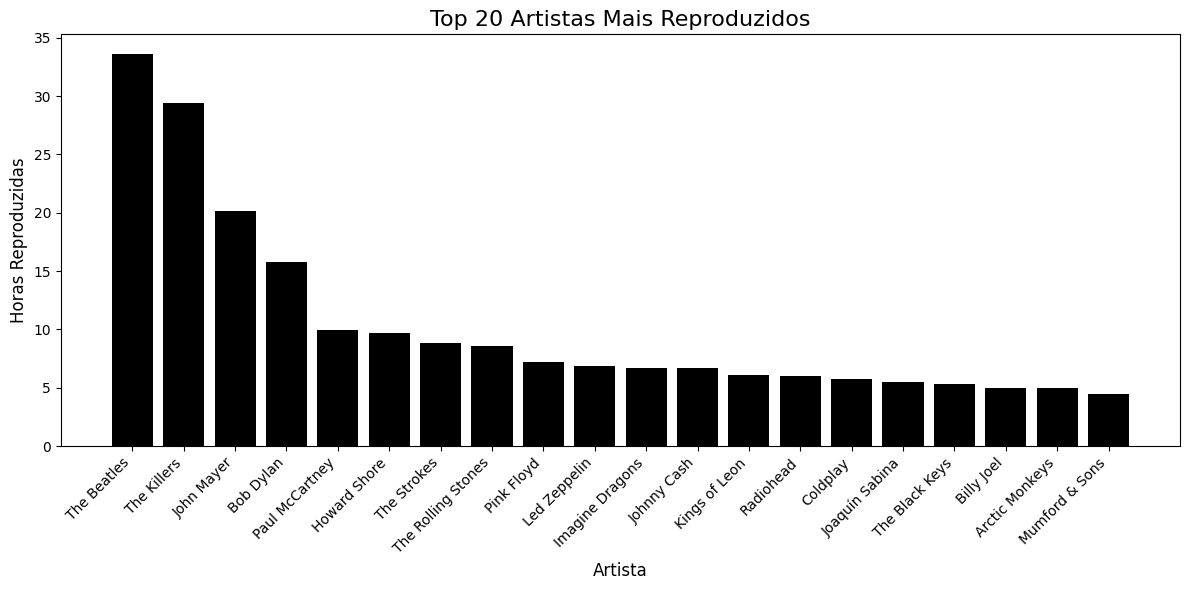

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(artistas_mais_tocados['Artista'].head(20), artistas_mais_tocados['Total Horas'].head(20), color='black')


plt.title('Top 20 Artistas Mais Reproduzidos', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Horas Reproduzidas', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos artistas

plt.tight_layout()
plt.show()

Vamos também visualizar qual foi o artista preferido de cada ano desse usuário.

In [32]:
artista_por_ano = dados_spotify.groupby(['Ano', 'Artista'])['Horas Tocadas'].sum().reset_index(name='Total Horas')
top_artista_por_ano = artista_por_ano.loc[artista_por_ano.groupby('Ano')['Total Horas'].idxmax()].reset_index(drop=True) #Usando o comando loc para localizar o artista mais ouvido de cada ano usando o df criado pelo groupby
top_artista_por_ano = top_artista_por_ano.sort_values(by='Ano', ascending= True)
top_artista_por_ano

,Ano,Artista,Total Horas
0,2013,John Mayer,0.165267
1,2014,Stevie Ray Vaughan,0.011370
2,2015,The Rolling Stones,0.277157
3,2016,The Beatles,1.584921
4,2017,The Beatles,6.771697
5,2018,The Beatles,5.097944
6,2019,The Beatles,5.261969
7,2020,The Killers,10.017344
8,2021,The Killers,3.869448
9,2022,Joaquín Sabina,4.017271


Apesar de The Beatles ainda ser o artista mais reproduzido do usuário, outros artistas se destacaram mais nos últimos anos.

E o que conseguimos descobrir sobre as músicas mais puladas por esse usuário?

In [33]:
musica_mais_pulada = dados_spotify.groupby(['Música', 'Álbum', 'Artista'])['Skip?'].count().reset_index(name = 'Total Skips')
musica_mais_pulada = musica_mais_pulada.sort_values(by='Total Skips', ascending= False)
musica_mais_pulada.head(10)

,Música,Álbum,Artista,Total Skips
9435,Ode To The Mets,The New Abnormal,The Strokes,207
6489,In the Blood,The Search for Everything,John Mayer,181
91,19 Dias y 500 Noches - En Directo,Nos Sobran Los Motivos,Joaquín Sabina,148
606,All These Things That I've Done,Hot Fuss,The Killers,142
2570,Concerning Hobbits,The Lord of the Rings: The Fellowship of the R...,Howard Shore,142
2517,Come Together - Remastered 2009,Abbey Road,The Beatles,137
15086,Yesterday - Remastered 2009,Help!,The Beatles,134
2730,Crucify Your Mind,Cold Fact,Rodríguez,131
8751,Mr. Brightside,Hot Fuss,The Killers,127
10640,Reminder,Babel,Mumford & Sons,127


Podemos ver que a música mais pulada pelo usuário é, também, a música mais ouvida por ele.
Será que esse comportamento se repete com frequência?

In [34]:
# Para analisar isso, vamos fazer uma função agregando duas análises de skips e horas tocadas usando a função agg.

musica_mais_pulada_horas = dados_spotify.groupby(['Música', 'Álbum', 'Artista']).agg({'Skip?': 'count', 'Horas Tocadas': 'sum'}).reset_index()
musica_mais_pulada_horas = musica_mais_pulada_horas.rename(columns={'Skip?': 'Total Skips'})
musica_mais_pulada_horas = musica_mais_pulada_horas.sort_values(by='Total Skips', ascending=False).reset_index(drop=True)
musica_mais_pulada_horas.head(10)

,Música,Álbum,Artista,Total Skips,Horas Tocadas
0,Ode To The Mets,The New Abnormal,The Strokes,207,1.873099
1,In the Blood,The Search for Everything,John Mayer,181,1.067419
2,19 Dias y 500 Noches - En Directo,Nos Sobran Los Motivos,Joaquín Sabina,148,1.192057
3,All These Things That I've Done,Hot Fuss,The Killers,142,0.993192
4,Concerning Hobbits,The Lord of the Rings: The Fellowship of the R...,Howard Shore,142,0.534423
5,Come Together - Remastered 2009,Abbey Road,The Beatles,137,0.630074
6,Yesterday - Remastered 2009,Help!,The Beatles,134,0.414838
7,Crucify Your Mind,Cold Fact,Rodríguez,131,0.551183
8,Mr. Brightside,Hot Fuss,The Killers,127,0.545010
9,Reminder,Babel,Mumford & Sons,127,0.451098


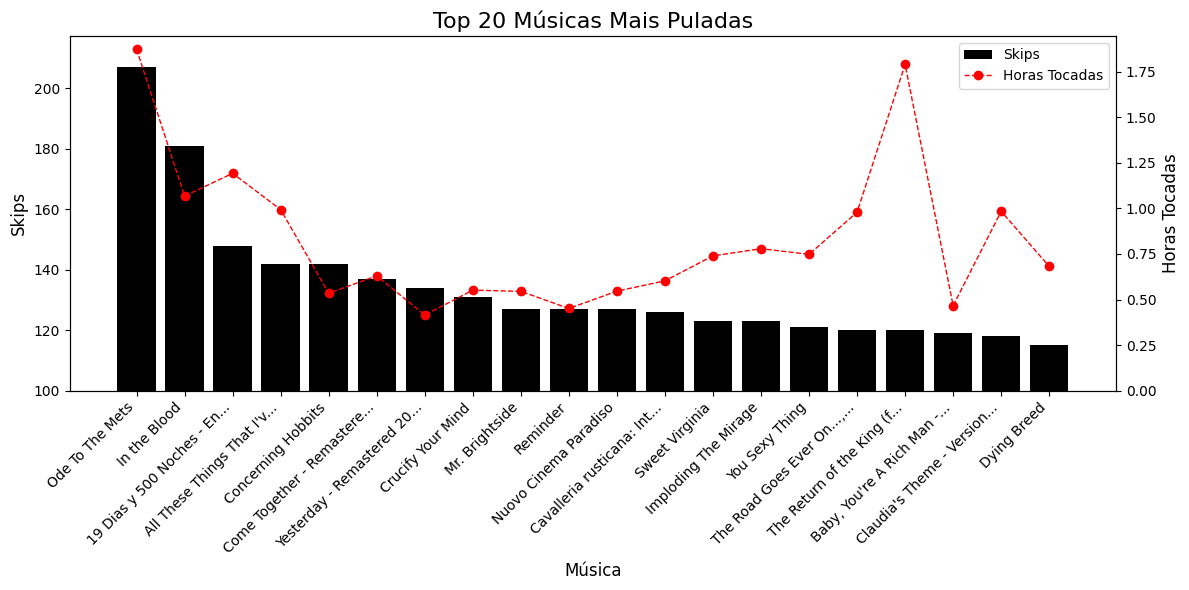

In [35]:
# Aqui, podemos fazer um gráfico de dois eixos utilizando a função ax1 e ax1.twinx(). Dessa forma é possível visualizar em um mesmo gráfico as músicas com mais skips e suas horas de reprodução.

plt.figure(figsize=(12, 6))
ax1 = plt.gca()
barras = ax1.bar(
    [x[:25] + '...' if len(x) > 25 else x for x in musica_mais_pulada_horas['Música'].head(20)],  # Truncar nomes
    musica_mais_pulada_horas['Total Skips'].head(20),
    color='black',
    label='Skips'
)

ax1.set_title('Top 20 Músicas Mais Puladas', fontsize=16)
ax1.set_xlabel('Música', fontsize=12)
ax1.set_ylabel('Skips', fontsize=12)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylim(100, None)

ax2 = ax1.twinx()
pontos = ax2.plot(
    [x[:25] + '...' if len(x) > 25 else x for x in musica_mais_pulada_horas['Música'].head(20)],
    musica_mais_pulada_horas['Horas Tocadas'].head(20),
    color='red',
    marker='o',
    linestyle='--',
    linewidth=1,
    label='Horas Tocadas'
)

ax2.set_ylabel('Horas Tocadas', fontsize=12)
ax2.set_ylim(0, None)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

Observando o gráfico, vemos que o comportamento não se repete com as outras músicas mais ouvidas do usuário, podendo indicar que o aplicativo está sugerindo de forma demasiada a faixa mais reproduzida pelo usuário.

In [51]:
ode_to_the_mets = dados_spotify[dados_spotify['Música'] == 'Ode To The Mets']
ode_to_the_mets_inicio = ode_to_the_mets.groupby('Razão de Início')['Razão de Início'].count().reset_index(name='Contagem')
ode_to_the_mets_inicio = ode_to_the_mets_inicio.sort_values(by='Contagem', ascending=False).reset_index(drop=True)
ode_to_the_mets_inicio


,Razão de Início,Contagem
0,Começou Após Anterior,89
1,Reprodução por Clique,86
2,Botão Avançar,10
3,Load do App,8
4,Reprodução Remota,6
5,Botão de Play,4
6,Voltou para Anterior,4


Com esses dados, é possível ver que a faixa é mais constantemente reproduzida pelo aplicativo do que diretamente escolhida pelo usuário.

### Saber essas informações sobre o perfil comportamental do usuário pode gerar bons insights no momento de novas recomendações do aplicativo.